<a href="https://colab.research.google.com/github/jsroa15/KKBOX/blob/main/Churn_Prediction_KKBOX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Necesary importings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Machine learning models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import xgboost as xgb

#Machine learning utilities
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [8]:
#Loading Data

members=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/df_members.csv')
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/train.csv')
transactions=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/df_transactions.csv')
logs=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/df_logs.csv')



In [9]:
#Merging data

df=df.merge(members,on='msno',how='left')

df=df.merge(transactions,on='msno',how='left')

df=df.merge(logs,on='msno',how='left')

In [10]:
#Head

df.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,month_init,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel,discount,pay_more,range_plan_days,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,total_hours
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,female,9.0,2005-04-06,4.0,38.0,18.5,74.5,74.5,0,0,0,0,0-30,1.500000,0.500000,0.750000,0.250000,18.500000,20.500000,5082.356000,1.411766
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10.0,38.0,male,9.0,2005-04-07,4.0,39.0,30.0,149.0,149.0,1,1,0,1,0-30,0.866667,0.400000,0.300000,0.300000,19.566667,13.200000,5273.284600,1.464801
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11.0,27.0,female,9.0,2005-10-16,10.0,39.0,30.0,149.0,149.0,1,1,0,0,0-30,3.733333,0.800000,0.733333,1.733333,44.666667,42.733333,10823.629867,3.006564
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13.0,23.0,female,9.0,2005-11-02,11.0,27.5,410.0,894.0,894.0,0,0,0,0,>180,7.803571,2.535714,2.446429,2.160714,20.892857,20.821429,5863.077875,1.628633
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3.0,27.0,male,9.0,2005-12-28,12.0,38.0,30.0,149.0,149.0,0,0,0,0,0-30,1.950000,0.700000,0.933333,4.183333,93.316667,97.400000,25015.508267,6.948752


In [11]:
#Validation

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992931 entries, 0 to 992930
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    992931 non-null  object 
 1   is_churn                992931 non-null  int64  
 2   city                    875468 non-null  float64
 3   bd                      875468 non-null  float64
 4   gender                  875468 non-null  object 
 5   registered_via          875468 non-null  float64
 6   registration_init_time  875468 non-null  object 
 7   month_init              875468 non-null  float64
 8   payment_method_id       992931 non-null  float64
 9   payment_plan_days       992931 non-null  float64
 10  plan_list_price         992931 non-null  float64
 11  actual_amount_paid      992931 non-null  float64
 12  is_auto_renew           992931 non-null  int64  
 13  is_cancel               992931 non-null  int64  
 14  discount            

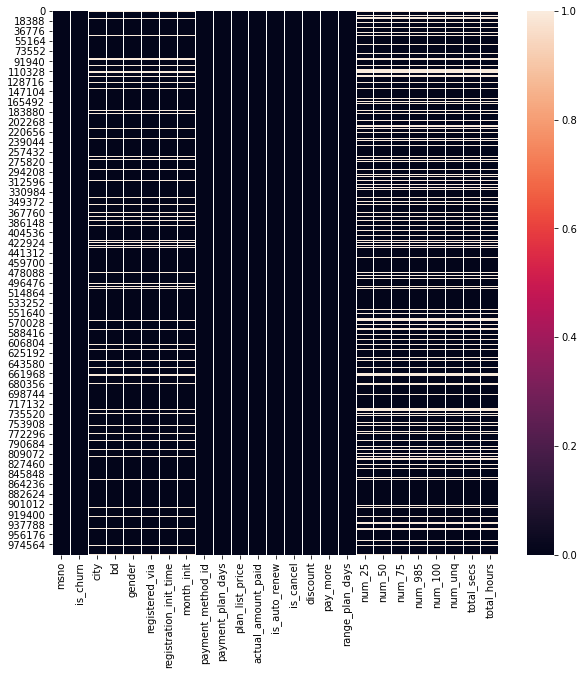

In [12]:
#Missing Values

df.isnull().sum()
f, axes = plt.subplots(figsize=(10,10))
sns.heatmap(df.isna())
plt.show()

In [13]:
#Drop missing values

df.dropna(axis=0,inplace=True)

In [14]:
#Changing datatypes

df=df.astype({'city':'category','registered_via':'category','month_init':'category','payment_method_id':'category',\
              'is_auto_renew':'category','is_cancel':'category','discount':'category','pay_more':'category',\
              })


# Exploratory Data Analysis

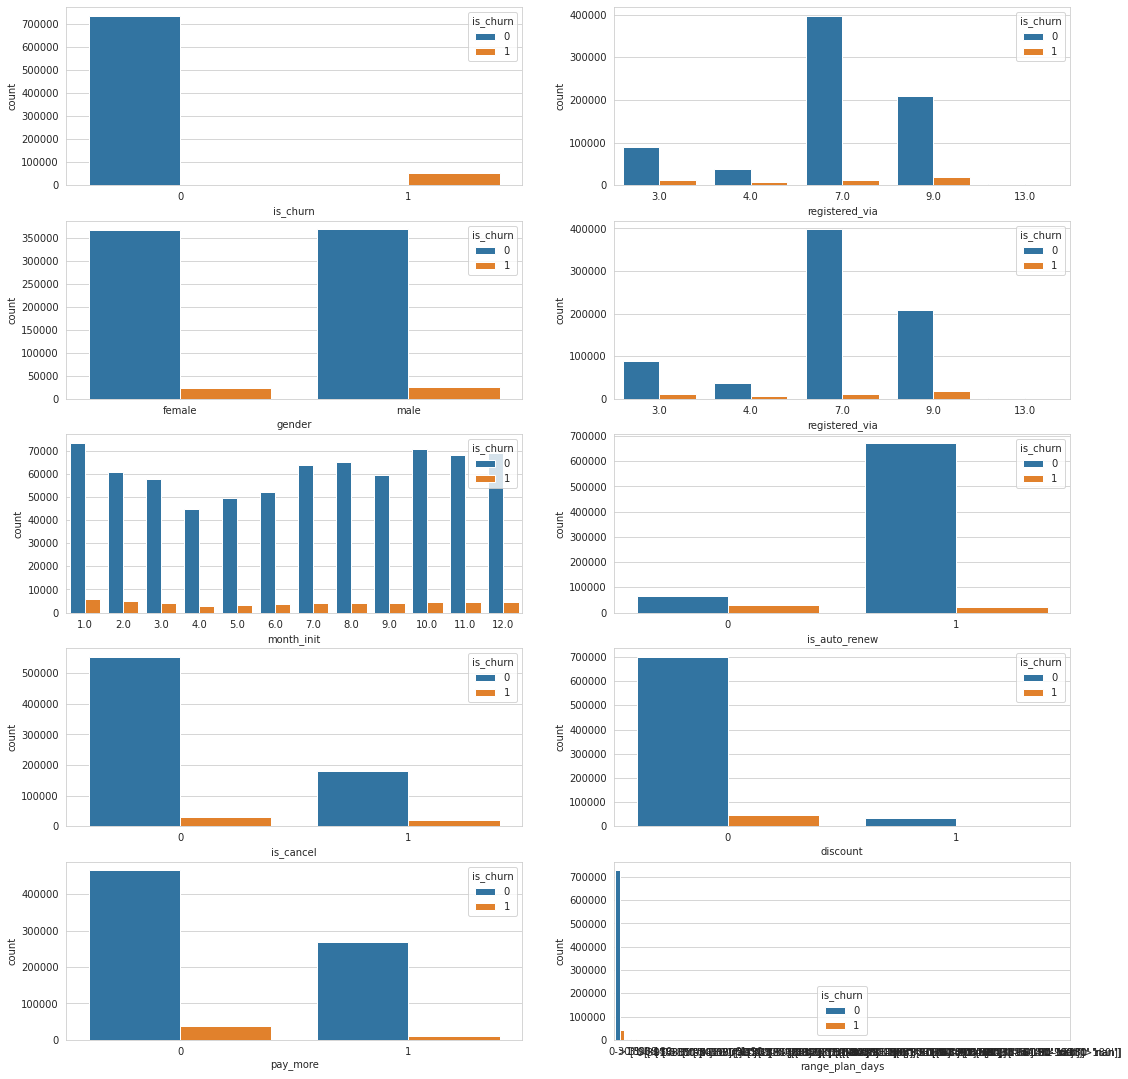

In [15]:
#Target variable with categorical features
sns.set_style("whitegrid")
tupll=(18,19)
f, axes = plt.subplots(nrows=5, ncols=2,figsize=tupll) 
sns.countplot(ax=axes[0,0],x='is_churn',hue='is_churn',data=df)
sns.countplot(ax=axes[0,1],x='registered_via',hue='is_churn',data=df)
sns.countplot(ax=axes[1,0],x='gender',hue='is_churn',data=df)
sns.countplot(ax=axes[1,1],x='registered_via',hue='is_churn',data=df)
sns.countplot(ax=axes[2,0],x='month_init',hue='is_churn',data=df)
sns.countplot(ax=axes[2,1],x='is_auto_renew',hue='is_churn',data=df)
sns.countplot(ax=axes[3,0],x='is_cancel',hue='is_churn',data=df)
sns.countplot(ax=axes[3,1],x='discount',hue='is_churn',data=df)
sns.countplot(ax=axes[4,0],x='pay_more',hue='is_churn',data=df)
sns.countplot(ax=axes[4,1],x='range_plan_days',hue='is_churn',data=df)
plt.show()

In [16]:
def plotting_categorical(data,rows,cols,hue,x_list,size):
  '''Plot categorical data in subplots using Seaborn

  Parameters
  --------------
    data:Data frame with data
    rows:Number of rows in subplot
    cols:Number of columns in subplot
    hue:Feature to distinguish in the plot
    x_list:List with features names
    size:Tupple with size of plot
    
  '''
  sns.set_style("whitegrid")

  pos=0
  f, axes = plt.subplots(nrows=rows, ncols=cols,figsize=size)
  for i in range(0,rows):
    for j in range(0,cols):
      
      sns.countplot(ax=axes[i,j],x=x_list[pos],hue=hue,data=data)
      pos+=1

  return(plt.show())


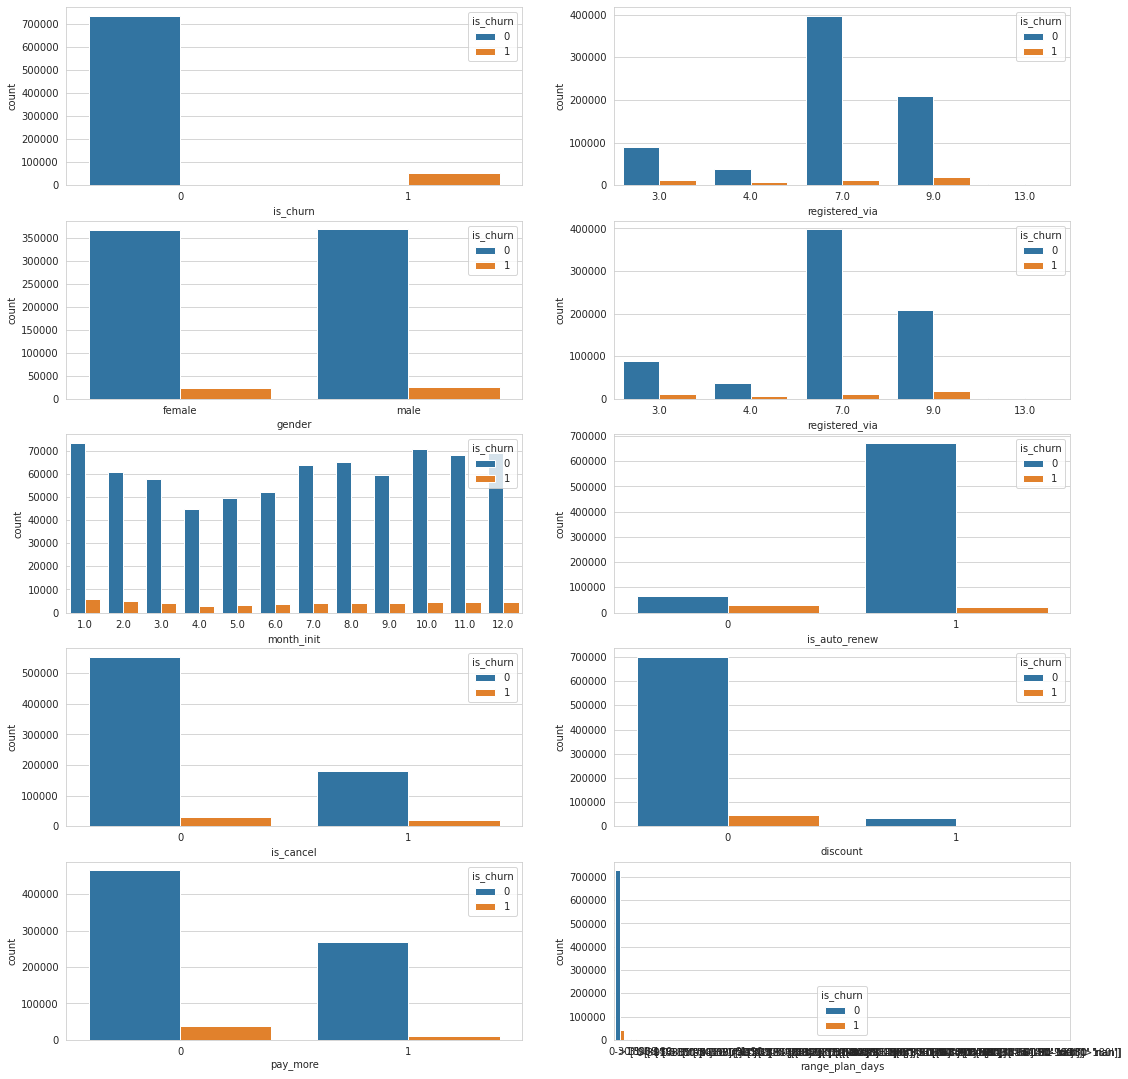

In [17]:
lista=['is_churn','registered_via','gender','registered_via','month_init','is_auto_renew','is_cancel','discount','pay_more','range_plan_days']

plotting_categorical(df,5,2,'is_churn',lista,(18,19))

Numerical Features

In [18]:
#Extracting numerical features

numerical=[x for x in df.columns  if df[x].dtype=='float']
numerical

['bd',
 'payment_plan_days',
 'plan_list_price',
 'actual_amount_paid',
 'num_25',
 'num_50',
 'num_75',
 'num_985',
 'num_100',
 'num_unq',
 'total_secs',
 'total_hours']

In [19]:
#Visualizing distributions of numerical
def plotting_numerical(data,rows,cols,x_list,size):
  '''Plot numerical data in subplots using Seaborn

  Parameters
  --------------
    data:Data frame with data
    rows:Number of rows in subplot
    cols:Number of columns in subplot
    x_list:List with features names
    size:Tupple with size of plot
    
  '''
  sns.set_style("whitegrid")

  pos=0
  f, axes = plt.subplots(nrows=rows, ncols=cols,figsize=size)
  for i in range(0,rows):
    for j in range(0,cols):
      
      sns.kdeplot(data=data,ax=axes[i,j],x=x_list[pos])
      pos+=1

  return(plt.show())


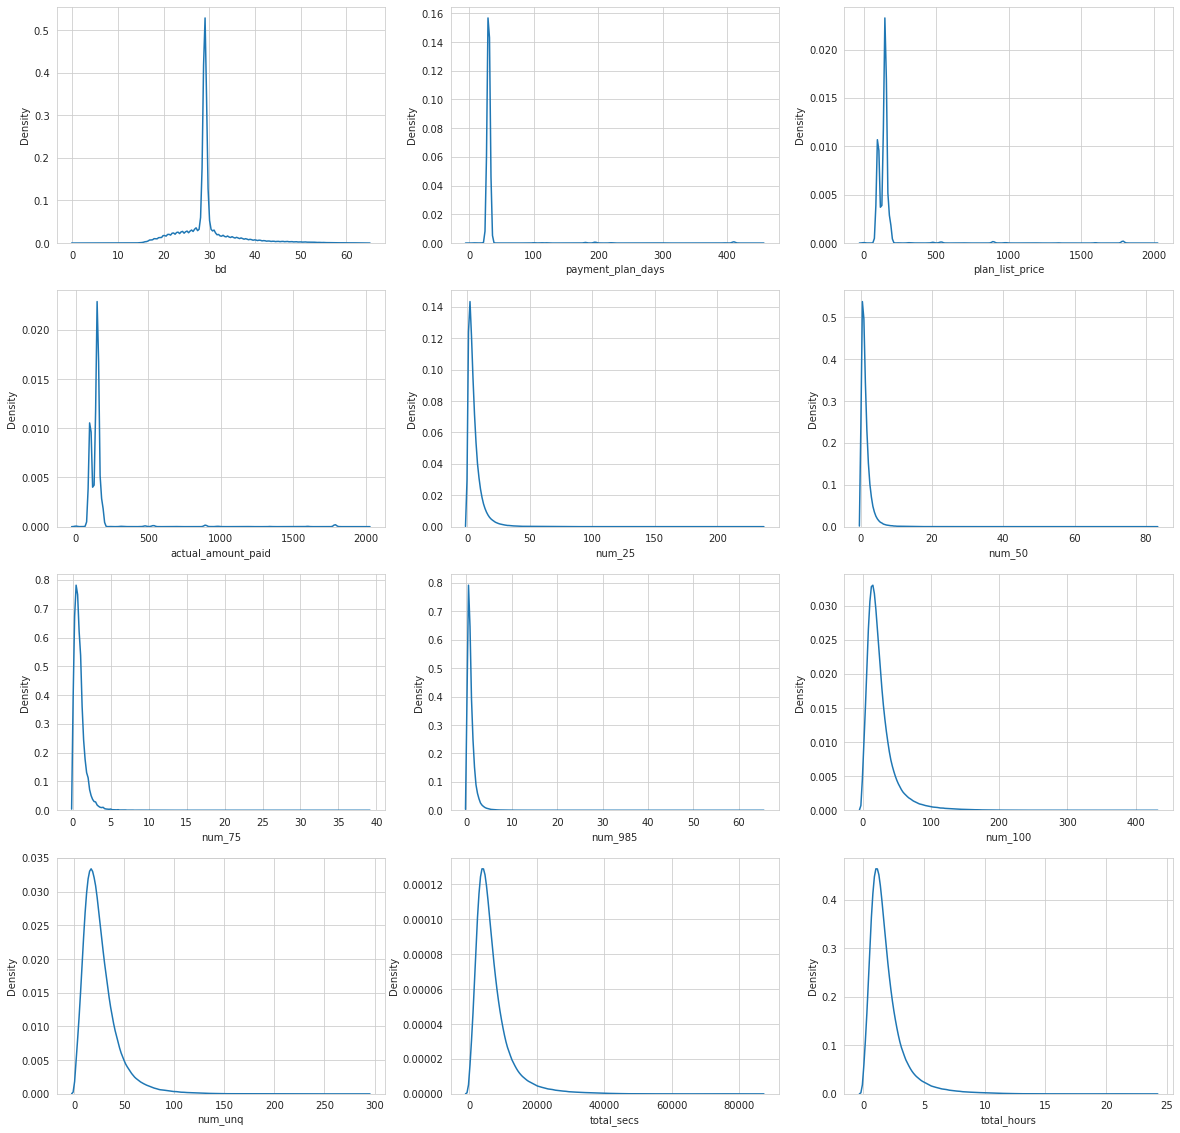

In [20]:
#Plotting numerical features

plotting_numerical(df,4,3,numerical,(20,20))

In [21]:
#Defining a function to plot numerical features Vs Target categorical feature

def plotting_numericalVsTarget(data,rows,cols,x_list,size,target):
  '''Plot numerical data with categorical variables in subplots using Seaborn

  Parameters
  --------------
    data:Data frame with data
    rows:Number of rows in subplot
    cols:Number of columns in subplot
    x_list:List with numerical features names
    size:Tupple with size of plot
    target: Categorical feature 
    
  '''
  plt.rcParams["axes.labelsize"] = 1
  sns.set(font_scale=1)
  pos=0
  f, axes = plt.subplots(nrows=rows, ncols=cols,figsize=size)
  for i in range(0,rows):
    for j in range(0,cols):
      
      sns.boxplot(data=data,ax=axes[i,j],y=x_list[pos],x=target)
      pos+=1

  return(plt.show())

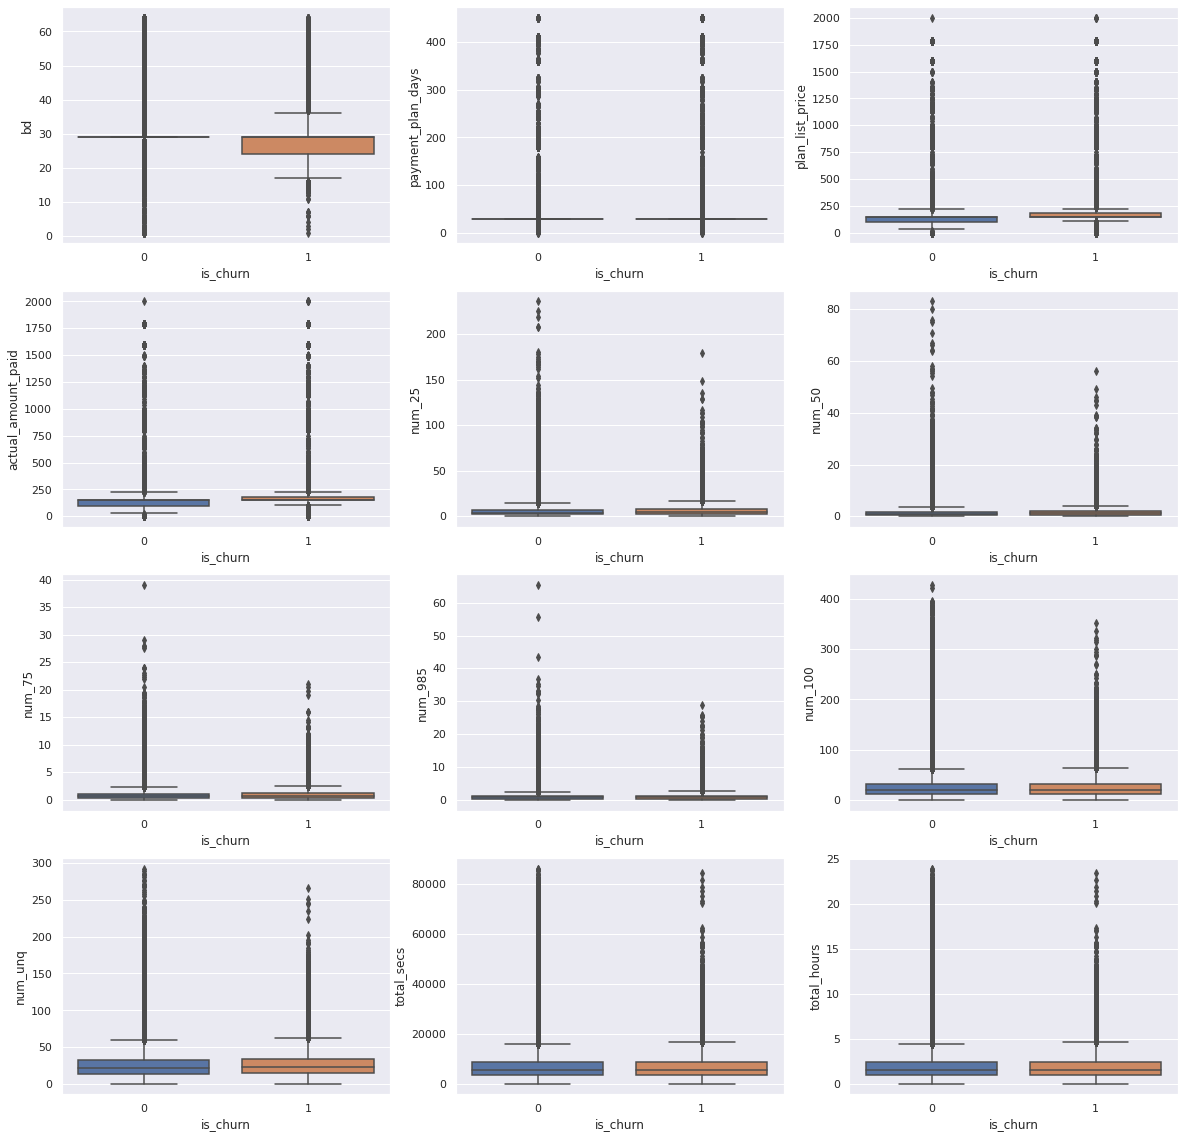

In [22]:
#Plotting numerical Vs Target Variable

plotting_numericalVsTarget(df,4,3,numerical,(20,20),'is_churn')

In [23]:
#Unique values in df
df.nunique().sort_values(ascending=False)

msno                      786188
total_hours               785755
total_secs                785680
num_100                    61565
num_unq                    56043
num_25                     25907
num_50                      9237
num_985                     7313
num_75                      5927
registration_init_time      4715
actual_amount_paid           192
plan_list_price              187
payment_plan_days            132
bd                            64
payment_method_id             63
range_plan_days               39
city                          21
month_init                    12
registered_via                 5
is_cancel                      2
discount                       2
pay_more                       2
gender                         2
is_churn                       2
is_auto_renew                  2
dtype: int64

In [24]:
#Value counts in range_plan_days

df.range_plan_days.value_counts()


0-30                                      769804
>180                                        8635
91-180                                      3025
['0-30' '>180']                             2115
['0-30' '91-180']                            818
['91-180' '>180']                            440
31-60                                        358
61-90                                        191
['0-30' '31-60']                             171
['0-30' '91-180' '>180']                     167
['0-30' '61-90']                             134
['0-30' 'nan']                                40
['>180' 'nan']                                38
['0-30' '>180' 'nan']                         36
['31-60' '>180']                              34
['0-30' '61-90' '>180']                       30
['61-90' '>180']                              30
['61-90' '91-180']                            17
['0-30' '61-90' '91-180']                     17
['0-30' '31-60' '91-180']                     15
['31-60' '91-180']  

In [25]:
#Value counts in payment_method_id

df['payment_method_id'].value_counts().tail(40)

33.5    474
14.0    433
38.5    298
37.5    248
27.5    233
35.5    203
17.0    187
39.5    179
32.5    151
13.0    140
12.0    138
31.5    102
30.5     94
34.5     85
24.0     72
25.5     71
24.5     69
11.0     68
26.0     66
28.5     66
40.5     47
10.0     40
19.5     39
29.5     29
25.0     26
22.5     18
26.5     16
8.0      16
18.5     12
15.0      9
21.5      7
3.0       7
17.5      6
6.0       4
14.5      3
16.5      2
23.5      2
12.5      1
9.0       1
20.5      1
Name: payment_method_id, dtype: int64

In [26]:
#Value counts in city

df['city'].value_counts()

1.0     380449
13.0     95138
5.0      68313
4.0      46131
15.0     41732
22.0     40498
6.0      24981
14.0     19324
12.0     11105
9.0       9205
11.0      8701
18.0      7522
8.0       7325
10.0      6289
17.0      5285
21.0      5081
3.0       4871
7.0       2560
16.0       909
20.0       638
19.0       131
Name: city, dtype: int64

In [27]:
#Drop additional variables

df.drop(['range_plan_days','registration_init_time','msno','is_cancel'],axis=1,inplace=True)

df.drop(['payment_method_id'],axis=1,inplace=True)

In [28]:
#Counts for is_churn
print(np.round(df.is_churn.value_counts()/df.shape[0]*100,2))

print(np.round(df.is_churn.value_counts()))

0    93.58
1     6.42
Name: is_churn, dtype: float64
0    735697
1     50491
Name: is_churn, dtype: int64


As we saw previously and now in the last cell, the dataset is completly unbalanced.

Now we are going to preprocess the data and apply SMOTE or Synthetic Minority Oversampling Technique

# Data Preprocessing

## Encoding features

In [29]:
features=[column_name for column_name in df.columns if column_name!='is_churn']

X=df[features]
y=df['is_churn']

In [30]:
#Getting dummies

X=pd.get_dummies(X,drop_first=True)

## Scaling data

In [31]:
# Split data into train test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=123)

In [32]:
#Instatiate standard scaler

scaler=StandardScaler()

#Fit the scaler

scaler.fit(X_train[numerical])

#Transform data

train_numerical_transform=scaler.transform(X_train[numerical])
test_numerical_transform=scaler.transform(X_test[numerical])

#Replace transform data in original X's data

X_train[numerical]=train_numerical_transform
X_test[numerical]=test_numerical_transform

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

## Generate synthetic samples to fix unbalanced data


In [33]:
#Shape of X_train and y_test

print('X_train Shape: ',X_train.shape)

print(y_train.value_counts())

X_train Shape:  (589641, 51)
0    551725
1     37916
Name: is_churn, dtype: int64


In [34]:
#Fixing issue with unbalanced data. Generation of synthetic samples

#Methology based on: https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18


from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=123, ratio=1.0,)
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [35]:
#Checking if syntectic samples are OK
from collections import Counter

print(Counter(y_train)) #Categories on initial y_train

print(Counter(y_train_smote)) #Categories in final y_train


Counter({0: 551725, 1: 37916})
Counter({0: 551725, 1: 551725})


# Modeling

###Baseline model: Logistic Regression with original samples

In [36]:
#Instantiate the model with no tuning

logreg=LogisticRegression(random_state=123)

#Fit the model

logreg.fit(X_train,y_train)

#Make predictions

logreg_pred=logreg.predict(X_test)

#Classification report and other metrics

print('\nConfusion Matrix')
print(confusion_matrix(y_test, logreg_pred))

print('\nAUC:',np.round(roc_auc_score(y_test,logreg_pred)*100,2),'%')
print('\nScores')
print('------------------------')

print('Accuracy:',np.round(accuracy_score(y_test,logreg_pred)*100,2),'%')
print('Precision:',np.round(precision_score(y_test,logreg_pred)*100,2),'%')
print('Recall:',np.round(recall_score(y_test,logreg_pred)*100,2),'%')
print('F1 score:',np.round(f1_score(y_test,logreg_pred)*100,2))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Confusion Matrix
[[183364    608]
 [ 11649    926]]

AUC: 53.52 %

Scores
------------------------
Accuracy: 93.76 %
Precision: 60.37 %
Recall: 7.36 %
F1 score: 13.13


Logistic regression with synthetic samples

In [37]:
#Instantiate the model with no tuning

logreg=LogisticRegression(random_state=123)

#Fit the model

logreg.fit(X_train_smote,y_train_smote)

#Make predictions

logreg_pred=logreg.predict(X_test)

#Classification report and other metrics

print('\nConfusion Matrix')
print(confusion_matrix(y_test, logreg_pred))

print('\nAUC:',np.round(roc_auc_score(y_test,logreg_pred)*100,2),'%')
print('\nScores')
print('------------------------')

print('Accuracy:',np.round(accuracy_score(y_test,logreg_pred)*100,2),'%')
print('Precision:',np.round(precision_score(y_test,logreg_pred)*100,2),'%')
print('Recall:',np.round(recall_score(y_test,logreg_pred)*100,2),'%')
print('F1 score:',np.round(f1_score(y_test,logreg_pred)*100,2))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Confusion Matrix
[[166116  17856]
 [  5416   7159]]

AUC: 73.61 %

Scores
------------------------
Accuracy: 88.16 %
Precision: 28.62 %
Recall: 56.93 %
F1 score: 38.09


###Implementing Random forest, SVC and XGBoost 

First, create a function to check performance

In [38]:
def performance_classification(model_dictionary,Xtrain,ytrain,Xtest,ytest):
  '''
  Evaluate the performance of classification models via CV. The base metric is F1 score

  Parameters
  ------------
    model_dictionary: A dictionary that contains as key the instantiate model and as value the model name
    Xtrain: The X train dataset
    ytrain: The y train dataset
    Xtest: The X test dataset
    ytest: The y test dataset

  '''
  null_list1=[]
  null_list2=[]

  for key,value in model_dictionary.items():
    f1=cross_val_score(key,Xtrain,ytrain,cv=5,scoring='f1',n_jobs=-1)
    
    #Store the F1 score from CV
    f1_cv=round(f1.mean()*100,2)


    #Fit and predict
    key.fit(Xtrain,ytrain)
    y_pred=key.predict(Xtest.values)

    #Calculate the F1 Score in Test
    f1_test=round(f1_score(y_test,y_pred)*100,2)
    null_list1.append(f1_cv)
    null_list2.append(f1_test)

  index=[x for x in model_dictionary.values()]
  dff=pd.DataFrame([null_list1,null_list2],index=['F1 Cross Val','F1 Test set']).transpose()
  dff.index=index
  print(dff)

In [42]:

#Evaluating some additional models

#Instantiate models


dt=DecisionTreeClassifier(random_state=123)
rf=RandomForestClassifier(random_state=123)
sv=SVC(random_state=123)
gb=GradientBoostingClassifier(random_state=123)
xgbc=XGBClassifier(random_state=123)
logreg=LogisticRegression(random_state=123)

#Defining model dictionary for function

models={xgbc:'Xgboost',rf:'Random Forest',logreg:'Logistic Regression',dt:'Decision Tree'}

#,rf:'Random Forest',gb:'Gradient Boosting',sv:'Support Vect Clf',xgbc:'Xgboost'
#Function call


performance_classification(models,X_train_smote,y_train_smote,X_test,y_test)


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


                     F1 Cross Val  F1 Test set
Xgboost                     82.03        38.38
Random Forest               95.37        30.79
Logistic Regression         69.35        38.09
Decision Tree               91.38        21.14


In [49]:
#Exporting training and test data to run models in other notebook
columns=X_train.columns
columns

X_train_smote_csv=pd.DataFrame(X_train_smote,columns=columns)
y_train_smote_csv=pd.DataFrame(y_train_smote,columns=['Is churn'])
print(X_train_smote_csv)
print(y_train_smote_csv)

               bd  payment_plan_days  ...  discount_1  pay_more_1
0       -0.062209          -0.123299  ...         0.0    0.000000
1       -0.062209          -0.123299  ...         0.0    0.000000
2       -2.105551          -0.123299  ...         0.0    0.000000
3       -1.254158          -0.123299  ...         0.0    0.000000
4       -0.743323          -0.123299  ...         0.0    0.000000
...           ...                ...  ...         ...         ...
1103445 -0.062209          -0.123299  ...         0.0    0.000000
1103446 -0.348605          -0.123299  ...         0.0    1.000000
1103447 -0.160706          -0.123299  ...         0.0    1.000000
1103448 -0.062209          -0.123299  ...         0.0    0.000000
1103449 -1.657762          -0.123299  ...         0.0    0.725949

[1103450 rows x 51 columns]
         Is churn
0               0
1               0
2               0
3               0
4               0
...           ...
1103445         1
1103446         1
1103447         1

In [52]:
#Exporting data
X_train_smote_csv.to_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/X_train_smote_csv.csv',index=False)
y_train_smote_csv.to_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/y_train_smote_csv.csv',index=False)
y_train.to_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/y_train.csv',index=False)
X_train.to_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/X_train.csv',index=False)
y_test.to_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/y_test.csv',index=False)
X_test.to_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/X_test.csv',index=False)